In [1]:
%load_ext nb_black
import IPython.display

IPython.display.set_matplotlib_formats("svg")

<IPython.core.display.Javascript object>

In [2]:
import estimate, sim
import matplotlib.pyplot as plt
import numpy as np
from betamix import sample_paths, BetaMixture
from scipy.stats import beta

<IPython.core.display.Javascript object>

In [3]:
def load_data(file):
    oo = np.loadtxt(file)
    return [oo[:, 1], oo[:, 0]]


pops = ["Britain", "Central", "Iberia", "Italy"]
obs = {x: np.loadtxt("data/" + x + "_LCT.txt").astype(int)[::-1] for x in pops}
# obs = {k: v[: 1 + np.where(v[:, 0])[0].max()] for k, v in obs.items()}

<IPython.core.display.Javascript object>

In [4]:
# M = 200
# prior = BetaMixture.uniform(M)
# prior = prior._replace(
#    log_c=np.log(0.99 * np.eye(M)[0] + 0.01 / M * np.ones(M))
# )  # prior .99 mass on mean AF 1/M at gen 0

# f = np.mean([x[1] / x[0] for x in obs["Britain"] if x[0] > 0])
# b = 10
# = b * f / (1 - f)
# dens = [beta.pdf((x + 1) / (M + 1), a, b) for x in range(M)]
# total = np.sum(dens)
# dens = [x / total for x in dens]
# prior = prior._replace(log_c=np.log(dens))

<IPython.core.display.Javascript object>

CPU times: user 4min 3s, sys: 1.12 s, total: 4min 4s
Wall time: 4min 4s


Text(0.5, 0, 'Generations before present')

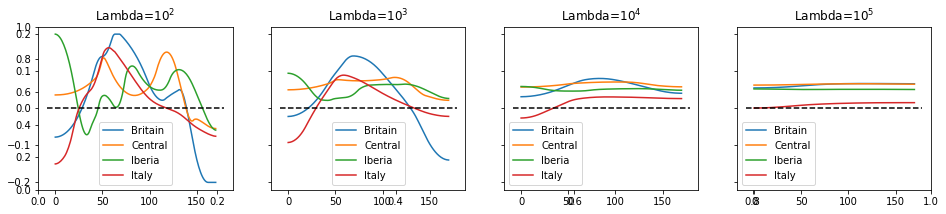

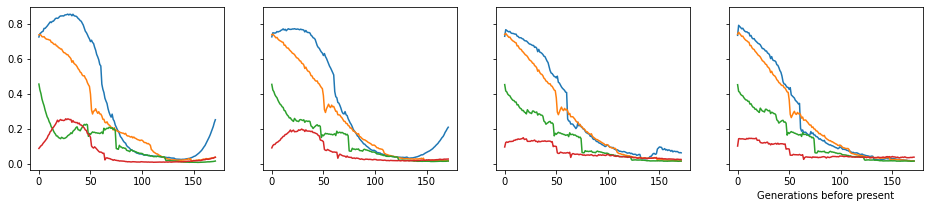

<IPython.core.display.Javascript object>

In [6]:
%%time
fig, axs = plt.subplots(ncols=4, figsize=(16, 3), sharey=True)
fig2, axs2 = plt.subplots(ncols=4, figsize=(16, 3), sharey=True)


for j, (ax, ax2, log10_lam) in enumerate(zip(axs, axs2, range(2, 6))):
    for pop in obs:
        data = obs[pop]
        L = len(data)
        Ne = np.full(L - 1, 1e4)
        s_hat, prior = estimate.estimate_em(data, Ne, lam=10 ** log10_lam, em_iterations=3)
        paths, _ = sample_paths(s_hat, Ne, data, 1000, prior=prior)
        ax.plot(s_hat, label=pop)
        ax2.plot(np.median(paths, axis=0), label=pop)

    ax.legend()
    ax.title.set_text(f"Lambda=$10^{log10_lam}$")
    ax.plot(ax.get_xlim(), [0., 0.], '--', color="black")

fig.add_subplot(111, frameon=False)
plt.xlabel("Generations before present")

In [ ]:
obs["Britain"].shape